# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [72]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:

url = "https://api.openweathermap.org/data/2.5/weather?"

unit = "imperial"
country = []
lat = []
lon = []
temperatures = []
wind_speed = []
clouds = []
humidity = []
date = []
cities_found = []

for city in cities:
    
    # Build query URL based on current element in units
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit


    try:
        print("found city : " + city)
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Get temperature from JSON response
        
        country.append(weather_json["sys"]["country"])
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        temperatures.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        clouds.append(weather_json["clouds"]["all"])
        humidity.append(weather_json["main"]["humidity"])
        date.append(weather_json["dt"])
        cities_found.append(weather_json["name"])
    
    
    except:
        print("Could not find city : " + city + " : Skipping ...")
    

found city : rikitea
found city : salalah
found city : eureka
found city : pevek
found city : dikson
found city : leningradskiy
found city : hobart
found city : busselton
found city : mataura
found city : saint-philippe
found city : port lincoln
found city : ponta do sol
found city : bredasdorp
found city : jamestown
found city : taolanaro
Could not find city : taolanaro : Skipping ...
found city : port blair
found city : victoria
found city : namibe
found city : kahului
found city : saskylakh
found city : vila
found city : faanui
found city : mount gambier
found city : bhawanipatna
found city : bethel
found city : san cristobal
found city : creel
found city : codrington
found city : kapaa
found city : katsuura
found city : beloha
found city : gisborne
found city : touros
found city : hilo
found city : akhaldaba
found city : vila velha
found city : kirakira
found city : chuy
found city : voloshka
found city : cuamba
found city : belmonte
found city : nhulunbuy
found city : bathsheba
fo

found city : rize
found city : kerteh
Could not find city : kerteh : Skipping ...
found city : maraba
found city : agadez
found city : pryshyb
found city : lalmohan
found city : padang
found city : anadyr
found city : taoudenni
found city : puerto madryn
found city : hailar
found city : guarapari
found city : chulman
found city : rivera
found city : bryant
found city : cockburn harbour
Could not find city : cockburn harbour : Skipping ...
found city : polson
found city : abu dhabi
found city : bandarbeyla
found city : maldonado
found city : saint anthony
found city : nome
found city : thai binh
found city : dolbeau
Could not find city : dolbeau : Skipping ...
found city : sobolevo
found city : tivoli
found city : sochi
found city : laramie
found city : coihaique
found city : jalu
found city : vitoria
found city : penzance
found city : yulara
found city : kapit
found city : muros
found city : krasnyy chikoy
found city : koumac
found city : piacabucu
found city : arman
found city : naze


In [13]:
#DO NOT RUN
#sample solution shown below for comparison

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
cities_df = pd.DataFrame({
                                'City': cities_found,
                                'Lat': lat,
                                'Lng': lon,
                                'Max Temp': temperatures,
                                'Humidity': humidity,
                                'Cloudiness': clouds,
                                'Wind Speed': wind_speed,
                                'Country': country,
                                'Date': date,
})

cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.23,64,25,18.48,PF,1651186983
1,Salalah,17.0151,54.0924,81.84,83,28,4.99,OM,1651186984
2,Eureka,40.8021,-124.1637,60.13,62,25,5.01,US,1651186918
3,Pevek,69.7008,170.3133,24.76,98,100,7.76,RU,1651186952
4,Dikson,73.5069,80.5464,6.87,91,73,19.08,RU,1651186985
...,...,...,...,...,...,...,...,...,...
551,Balabac,7.9868,117.0645,81.86,82,100,14.50,PH,1651187315
552,Pacific Grove,36.6177,-121.9166,66.54,69,20,14.97,US,1651187315
553,Marfino,55.7028,37.3822,37.31,81,98,2.24,RU,1651187316
554,Kiknur,57.3034,47.2011,28.74,57,14,4.90,RU,1651187317


In [15]:
#DO NOT RUN
 #sample solution shown below for comparison

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [75]:
#The .describe() function was something I found that creates the summary table very quickly.
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,19.567094,17.614253,60.699119,69.764388,56.728417,8.074371,1.651187e+09
std,33.288879,91.611741,19.610298,22.399491,38.729740,6.109699,1.259114e+02
min,-54.800000,-179.166700,2.910000,4.000000,0.000000,0.000000,1.651187e+09
25%,-8.614950,-63.057575,48.160000,60.000000,17.750000,3.667500,1.651187e+09
50%,24.993250,24.696800,64.220000,76.000000,67.000000,6.290000,1.651187e+09
75%,47.361875,98.344800,77.317500,86.000000,98.000000,10.855000,1.651187e+09
max,78.218600,179.316700,97.570000,100.000000,100.000000,32.210000,1.651187e+09


In [16]:
#DO NOT RUN
#sample solution shown below for comparison

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
#If there were, then we would use a .loc here. I have commented out the lines of code below

#clean_high_humid_df = cities_df.loc[cities_df['Humidity'] < 100]

#clean_high_humid_df

In [6]:
#DO NOT RUN
#sample solution shown below for comparison

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [17]:

#DO NOT RUN
#sample solution shown below for comparison

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".




In [19]:
#DO NOT RUN
#sample solution shown below for comparison

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

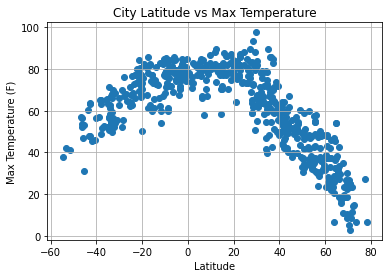

In [76]:
x_axis = cities_df['Lat']

y_axis = cities_df['Max Temp']

plt.title('City Latitude vs Max Temperature')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


plt.scatter(x_axis, y_axis)

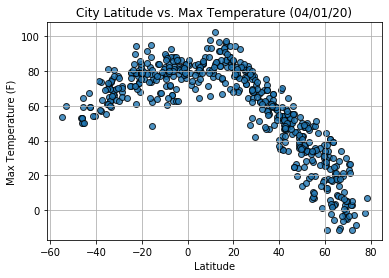

In [10]:
#DO NOT RUN
#sample solution shown below for comparison

## Latitude vs. Humidity Plot

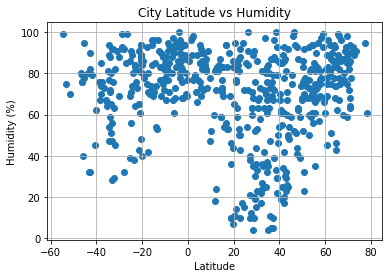

In [77]:
x_axis = cities_df['Lat']

y_axis = cities_df['Humidity']

plt.title('City Latitude vs Humidity')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.scatter(x_axis, y_axis)

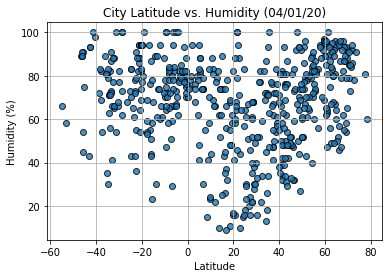

In [11]:
#DO NOT RUN
#sample solution shown below for comparison

## Latitude vs. Cloudiness Plot

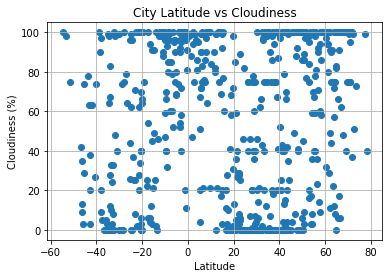

In [78]:
x_axis = cities_df['Lat']

y_axis = cities_df['Cloudiness']

plt.title('City Latitude vs Cloudiness')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.scatter(x_axis, y_axis)

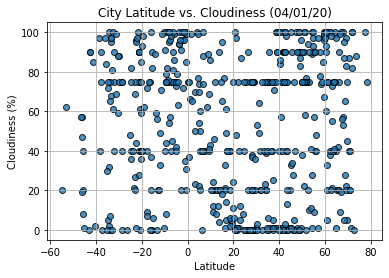

In [12]:
#DO NOT RUN
#sample solution shown below for comparison

## Latitude vs. Wind Speed Plot

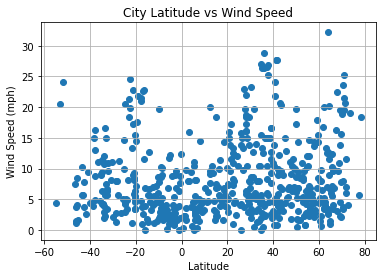

In [79]:
x_axis = cities_df['Lat']

y_axis = cities_df['Wind Speed']

plt.title('City Latitude vs Wind Speed')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.scatter(x_axis, y_axis)

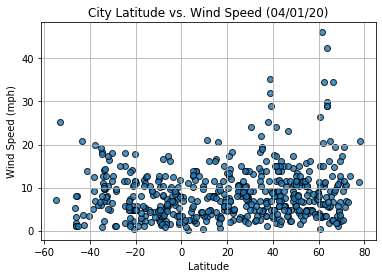

In [13]:
#DO NOT RUN
#sample solution shown below for comparison

## Linear Regression

In [80]:
northern_df = cities_df.loc[cities_df['Lat'] > 0]

southern_df = cities_df.loc[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r = -0.8776737052836272


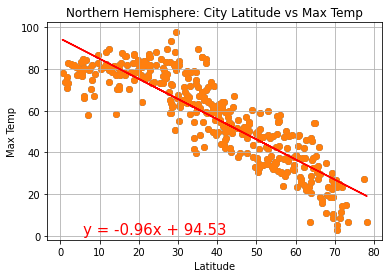

In [81]:
x_axis = northern_df['Lat']

y_axis = northern_df['Max Temp']

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r = " + str(corr_coeff[0]))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.title('Northern Hemisphere: City Latitude vs Max Temp')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.scatter(x_axis, y_axis)

The r-value is: 0.46937863826630627


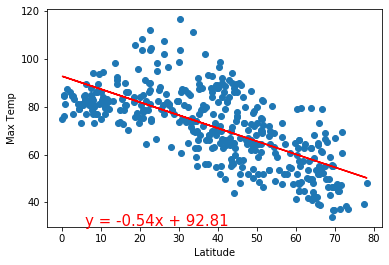

In [25]:
#DO NOT RUN
#sample solution shown below for comparison

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r = 0.7658628404348851


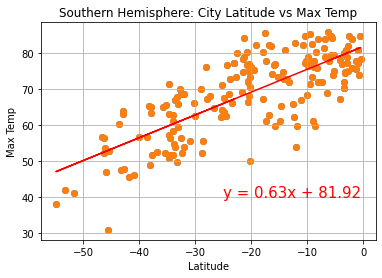

In [90]:
x_axis = southern_df['Lat']

y_axis = southern_df['Max Temp']

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r = " + str(corr_coeff[0]))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")

plt.title('Southern Hemisphere: City Latitude vs Max Temp')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.scatter(x_axis, y_axis)

The r-value is: 0.6082708688906918


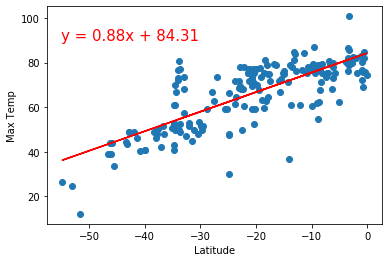

In [26]:
#DO NOT RUN
#sample solution shown below for comparison

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.15046392550798518


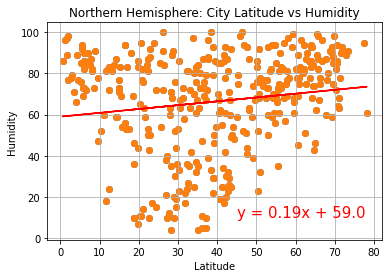

In [92]:
x_axis = northern_df['Lat']

y_axis = northern_df['Humidity']

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r = " + str(corr_coeff[0]))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.title('Northern Hemisphere: City Latitude vs Humidity')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.scatter(x_axis, y_axis)

The r-value is: 0.000543987878808455


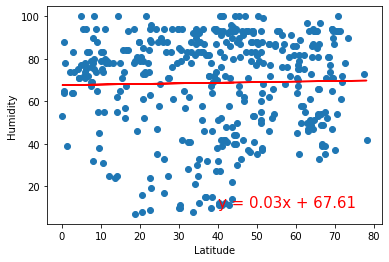

In [27]:
#DO NOT RUN
#sample solution shown below for comparison

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.29869832649147143


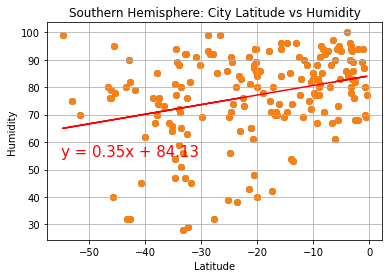

In [95]:
x_axis = southern_df['Lat']

y_axis = southern_df['Humidity']

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r = " + str(corr_coeff[0]))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")

plt.title('Southern Hemisphere: City Latitude vs Humidity')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.scatter(x_axis, y_axis)

The r-value is: 0.014985174297345524


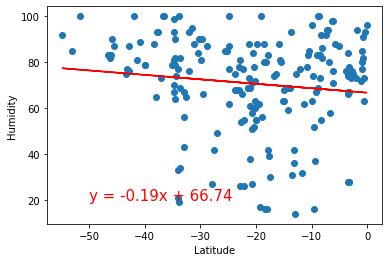

In [28]:
#DO NOT RUN
#sample solution shown below for comparison

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.17725549003590266


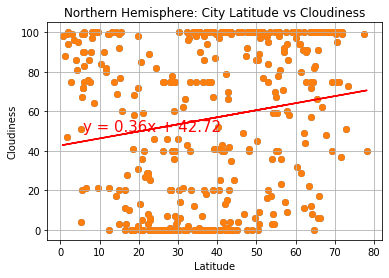

In [96]:
x_axis = northern_df['Lat']

y_axis = northern_df['Cloudiness']

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r = " + str(corr_coeff[0]))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,50),fontsize=15,color="red")

plt.title('Northern Hemisphere: City Latitude vs Cloudiness')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.scatter(x_axis, y_axis)

The r-value is: 0.0020898727664228514


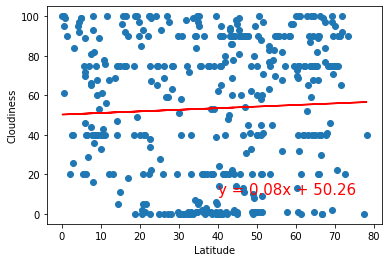

In [29]:
#DO NOT RUN
#sample solution shown below for comparison

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.3819209238895719


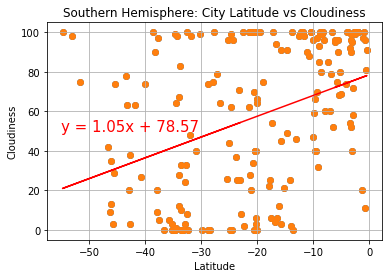

In [98]:
x_axis = southern_df['Lat']

y_axis = southern_df['Cloudiness']

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r = " + str(corr_coeff[0]))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")

plt.title('Southern Hemisphere: City Latitude vs Cloudiness')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.scatter(x_axis, y_axis)

The r-value is: 0.0035263772085582894


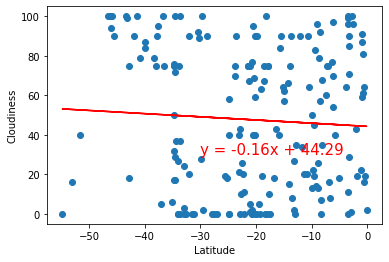

In [30]:
#DO NOT RUN
#sample solution shown below for comparison

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = 0.12988039153782877


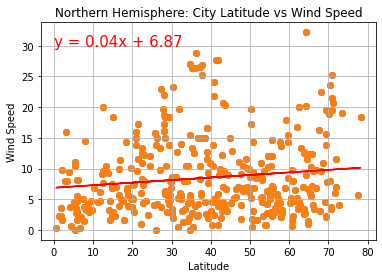

In [99]:
x_axis = northern_df['Lat']

y_axis = northern_df['Wind Speed']

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r = " + str(corr_coeff[0]))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

plt.title('Northern Hemisphere: City Latitude vs Wind Speed')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.scatter(x_axis, y_axis)

The r-value is: 0.04019723576144484


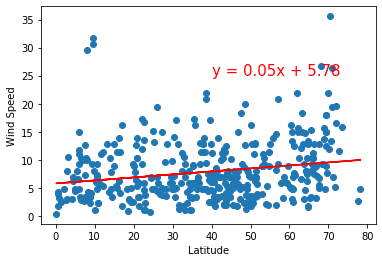

In [31]:
#DO NOT RUN
#sample solution shown below for comparison

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = -0.20281074834181184


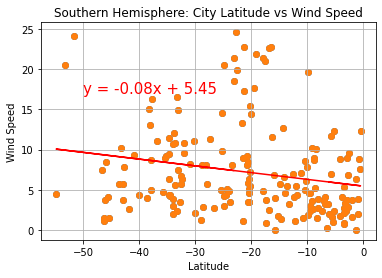

In [100]:
x_axis = southern_df['Lat']

y_axis = southern_df['Wind Speed']

corr_coeff = st.pearsonr(x_axis, y_axis)
print("r = " + str(corr_coeff[0]))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,17),fontsize=15,color="red")

plt.title('Southern Hemisphere: City Latitude vs Wind Speed')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.scatter(x_axis, y_axis)

The r-value is: 0.017128274759839232


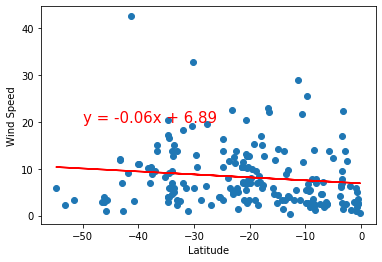

In [32]:
#DO NOT RUN
#sample solution shown below for comparison